In [5]:
import os

import pandas as pd

# Repositories
project_folder = r'C:\Users\avaquero\OneDrive - IREC-edu\CODI\11_AnalysisArchetype_Génerico'
os.chdir(project_folder)
from resources import reader
class currencyStep():
    def get_data(self,typeStep):
        pass    

class HourlyMulti(currencyStep):
    def get_data(typeStep,n_zones, name):
        import sys
        import os
        direct = r'C:\Users\avaquero\OneDrive - IREC-edu\CODI\11_AnalysisArchetype_Génerico'
        filePath = direct + '\\resources\data' + '\\' + str(name) + '\\' +'AllCombinedResults.csv'
        typeFile = reader.readCSV_withoutheader()
        read = reader.reader(filePath,typeFile)
        output_reader = read.start() 
        folders = []
        for i in output_reader:
            folders.append(i[1])
            
        P_ht = {}   # Heating demand
        P_cl = {}   # Cooling demand
        P_lig = {}  # Lighting demand
        P_dev = {}  # Devices demand
        P_dhw = {}  # Domestic hot water demand                
                
        for j in folders:
            P_ht.setdefault(j,{})
            P_cl.setdefault(j,{})
            P_lig.setdefault(j,{})
            P_dev.setdefault(j,{})
            P_dhw.setdefault(j,{})      
            filePath = direct + '\\resources\data' + '\\' + str(name) + '\\' + j + '\\' + 'Cons_per_use_FB2.txt'
            typeFile = reader.readCSV_withoutheader()
            read = reader.reader(filePath,typeFile)
            output_reader = read.start() 
                
            for k in range(1,n_zones+1):                    # Dictionary with n Zones as a key
                P_dev[j].setdefault('Dwelling_' + str(k),[])    
                P_lig[j].setdefault('Dwelling_' + str(k),[])
                P_ht[j].setdefault('Dwelling_' + str(k),[])
                P_cl[j].setdefault('Dwelling_' + str(k),[])
                P_dhw[j].setdefault('Dwelling_' + str(k),[])
               
            for k in output_reader:                      # Distributing the input data
                column_count = 1
                for n in range(1,n_zones+1):
                    data = k[0].split('\t')
                    P_dev[j]['Dwelling_' + str(n)].append(float(data[column_count].strip()))
                    P_lig[j]['Dwelling_' + str(n)].append(float(data[column_count+1].strip()))               
                    P_ht[j]['Dwelling_' + str(n)].append(float(data[column_count+2].strip()))            
                    P_cl[j]['Dwelling_' + str(n)].append(float(data[column_count+3].strip()))        
                    P_dhw[j]['Dwelling_' + str(n)].append(float(data[column_count+4].strip()))
                    column_count = column_count + 5
            
            for k in range(1,n_zones+1):                 # Delete the last row from the data
                    P_ht[j]['Dwelling_' + str(k)].pop(-1)
                    P_cl[j]['Dwelling_' + str(k)].pop(-1)               
                    P_lig[j]['Dwelling_' + str(k)].pop(-1)            
                    P_dev[j]['Dwelling_' + str(k)].pop(-1)       
                    P_dhw[j]['Dwelling_' + str(k)].pop(-1)       
        return output_reader, P_ht, P_cl, P_lig, P_dev, P_dhw   
    

class comfortMulti(currencyStep):
    def get_data(typeStep,n_zones):
        import sys
        import os
        direct = r'C:\Users\avaquero\OneDrive - IREC-edu\CODI\11_AnalysisArchetype_Génerico'
        t = os.listdir(direct + '\\resources\data\outputs_TRNSYS_caracas')
        folders = {}
        for i in t:
            folders.setdefault(i,[])
            filePath = direct + '\\resources\data\outputs_TRNSYS_caracas'+ '\\' + i +'\\' +'AllCombinedResults.csv'
            typeFile = reader.readCSV_withoutheader()
            read = reader.reader(filePath,typeFile)
            output_reader = read.start()   
            for j in output_reader:
                folders[i].append(j[1])
        Humidex = {}   #  % of time in each category 
        T_op = {}                    
        for i in folders:
            for j in folders[i]:
                Humidex.setdefault(j,{})
                T_op.setdefault(j,{})
                filePath = direct + '\\resources\data\outputs_TRNSYS_caracas'+ '\\' + i +'\\' + j + '\\' + 'Commit_AllOutput.csv'
                typeFile = reader.readCSV_withoutheader()
                read = reader.reader(filePath,typeFile)
                output_reader = read.start()                  
      
                for k in range(1,n_zones+1):                    # Dictionary with n Zones as a key
                    Humidex[j].setdefault('DW_' + str(k),[])    
                    T_op[j].setdefault('DW_' + str(k),[])                          
                for k in output_reader:                      # Distributing the input data
                    for n in range(1,n_zones+1):
                        if n_zones == 3:
                            Humidex[j]['DW_' + str(n)].append(float(k[n+86]))
                            T_op[j]['DW_' + str(n)].append(float(k[n+89]))
                        if n_zones == 4:
                            if n < 4:
                                Humidex[j]['DW_' + str(n)].append(float(k[n+86]))
                                T_op[j]['DW_' + str(n)].append(float(k[n+89]))
                            if n == 4:
                                Humidex[j]['DW_' + str(n)].append(float(k[95]))
                                T_op[j]['DW_' + str(n)].append(float(k[n+89]))                                
                        
                for k in range(1,n_zones+1):                 # Delete the last row from the data
                        Humidex[j]['DW_' + str(k)].pop(0) 
                        T_op[j]['DW_' + str(k)].pop(0)
        return Humidex, T_op
        
class readTRNSYS:
    def __init__(self, typeStep : currencyStep, n_zones, name):
        self.typeStep = typeStep
        self.n_zones = n_zones
        self.name = name
         
    def start(self):        
        return self.typeStep.get_data(self.n_zones, self.name)




In [6]:
import sys

direct = sys.path[0]
direct =  r'C:\Users\avaquero\OneDrive - IREC-edu\CODI\11_AnalysisArchetype_Génerico'
direct

'C:\\Users\\avaquero\\OneDrive - IREC-edu\\CODI\\11_AnalysisArchetype_Génerico'

In [9]:
typeStep = HourlyMulti() 
n_zones = 1
name = 'FE35'
n_viv = 1
output = readTRNSYS(typeStep, n_viv, name)

building_to_analyse = 'FE35'
output_reader, P_ht, P_cl, P_lig, P_dev, P_dhw = output.start()



In [10]:
len(P_ht)

84

In [11]:
import pandas as pd

P_htd = pd.DataFrame(P_ht)

In [12]:
len(P_htd["BC0_0"].explode())

8760

In [13]:
P_htd["BC0_0"].explode()


Dwelling_1         0.0
Dwelling_1    0.013944
Dwelling_1     0.01577
Dwelling_1     0.01582
Dwelling_1    0.015263
                ...   
Dwelling_1    0.032699
Dwelling_1    0.032239
Dwelling_1     0.03124
Dwelling_1    0.031478
Dwelling_1    0.033358
Name: BC0_0, Length: 8760, dtype: object

In [14]:
P_htd.explode('BC0_0')

,BC0_0,BC0_180,BC0_270,BC0_90,P111_0_W8_R10,P111_0_W8_R12,P111_0_W8_R14,P111_0_W8_R6,P111_0_W8_R8,P111_180_W8_R10,...,P221_90_W6_R5,P221_90_W8_R5,P222_0_W6_R5,P222_0_W8_R5,P222_180_W6_R5,P222_180_W8_R5,P222_270_W6_R5,P222_270_W8_R5,P222_90_W6_R5,P222_90_W8_R5
Dwelling_1,0.0,"[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013936745151649697, 0.0156451141277881...","[0.0, 0.01393674510724676, 0.01564510851532216...","[0.0, 0.013936745088265173, 0.0156451066715279...","[0.0, 0.013936746174926387, 0.0156451817794168...","[0.0, 0.013936745356120371, 0.0156451311776920...","[0.0, 0.013936745151649697, 0.0156451141277881...",...,"[0.0, 0.011171831131033746, 0.0123646512362125...","[0.0, 0.01117183112702784, 0.01236465035777076...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480..."
Dwelling_1,0.013944,"[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013936745151649697, 0.0156451141277881...","[0.0, 0.01393674510724676, 0.01564510851532216...","[0.0, 0.013936745088265173, 0.0156451066715279...","[0.0, 0.013936746174926387, 0.0156451817794168...","[0.0, 0.013936745356120371, 0.0156451311776920...","[0.0, 0.013936745151649697, 0.0156451141277881...",...,"[0.0, 0.011171831131033746, 0.0123646512362125...","[0.0, 0.01117183112702784, 0.01236465035777076...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480..."
Dwelling_1,0.01577,"[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013936745151649697, 0.0156451141277881...","[0.0, 0.01393674510724676, 0.01564510851532216...","[0.0, 0.013936745088265173, 0.0156451066715279...","[0.0, 0.013936746174926387, 0.0156451817794168...","[0.0, 0.013936745356120371, 0.0156451311776920...","[0.0, 0.013936745151649697, 0.0156451141277881...",...,"[0.0, 0.011171831131033746, 0.0123646512362125...","[0.0, 0.01117183112702784, 0.01236465035777076...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480..."
Dwelling_1,0.01582,"[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013943688146161613, 0.0157703161330368...","[0.0, 0.013936745151649697, 0.0156451141277881...","[0.0, 0.01393674510724676, 0.01564510851532216...","[0.0, 0.013936745088265173, 0.0156451066715279...","[0.0, 0.013936746174926387, 0.0156451817794168...","[0.0, 0.013936745356120371, 0.0156451311776920...","[0.0, 0.013936745151649697, 0.0156451141277881...",...,"[0.0, 0.011171831131033746, 0.0123646512362125...","[0.0, 0.01117183112702784, 0.01236465035777076...","[0.0, 0.01117183098306302, 0.01236464445548981...","[0.0, 0.011171830979057095, 0.0123646435770480...","[0.0, 0.01

In [15]:
melted = P_htd.melt()

In [16]:
heating_demand = pd.concat([P_htd[col].explode().reset_index(drop=True) for col in P_htd.columns],axis=1)
heating_demand

,BC0_0,BC0_180,BC0_270,BC0_90,P111_0_W8_R10,P111_0_W8_R12,P111_0_W8_R14,P111_0_W8_R6,P111_0_W8_R8,P111_180_W8_R10,...,P221_90_W6_R5,P221_90_W8_R5,P222_0_W6_R5,P222_0_W8_R5,P222_180_W6_R5,P222_180_W8_R5,P222_270_W6_R5,P222_270_W8_R5,P222_90_W6_R5,P222_90_W8_R5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.013944,0.013944,0.013944,0.013944,0.013937,0.013937,0.013937,0.013937,0.013937,0.013937,...,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172
2,0.01577,0.01577,0.01577,0.01577,0.015645,0.015645,0.015645,0.015645,0.015645,0.015645,...,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365
3,0.01582,0.01582,0.01582,0.01582,0.015274,0.015274,0.015274,0.015276,0.015275,0.015274,...,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881
4,0.015263,0.015263,0.015263,0.015263,0.014088,0.014087,0.014087,0.014094,0.01409,0.014088,...,0.010739,0.010739,0.01074,0.010739,0.01074,0.010739,0.01074,0.010739,0.01074,0.010739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.032699,0.032334,0.029046,0.025207,0.019698,0.019257,0.018912,0.021117,0.020287,0.019171,...,0.006863,0.006607,0.02025,0.019968,0.019743,0.019467,0.01843,0.018205,0.011443,0.011133
8756,0.032239,0.03212,0.028936,0.025512,0.020055,0.019626,0.019291,0.021437,0.020628,0.019712,...,0.008051,0.007717,0.020576,0.0203,0.020259,0.019989,0.018905,0.018691,0.012724,0.012426
8757,0.03124,0.031211,0.028273,0.025072,0.019558,0.019141,0.018815,0.020907,0.020117,0.019313,...,0.008766,0.008446,0.020416,0.020146,0.020198,0.019934,0.018875,0.018672,0.013242,0.012953
8758,0.031478,0.031473,0.028924,0.025951,0.020435,0.020042,0.019736,0.021709,0.020962,0.020252,...,0.010251,0.009953,0.020851,0.020598,0.020693,0.020445,0.019485,0.019301,0.014436,0.014165


In [17]:
import datetime
start_date = datetime.datetime(year=2023, month=1, day=1, hour=0, minute=0, second=0)
end_date = datetime.datetime(year=2023, month=12, day=31, hour=23, minute=0, second=0)

# Generate a sequence of hourly datetime objects for the year
hourly_datetime_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Create a DataFrame with the hourly datetime objects as the index
heating_demand.index = hourly_datetime_range
heating_demand

,BC0_0,BC0_180,BC0_270,BC0_90,P111_0_W8_R10,P111_0_W8_R12,P111_0_W8_R14,P111_0_W8_R6,P111_0_W8_R8,P111_180_W8_R10,...,P221_90_W6_R5,P221_90_W8_R5,P222_0_W6_R5,P222_0_W8_R5,P222_180_W6_R5,P222_180_W8_R5,P222_270_W6_R5,P222_270_W8_R5,P222_90_W6_R5,P222_90_W8_R5
2023-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00,0.013944,0.013944,0.013944,0.013944,0.013937,0.013937,0.013937,0.013937,0.013937,0.013937,...,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172
2023-01-01 02:00:00,0.01577,0.01577,0.01577,0.01577,0.015645,0.015645,0.015645,0.015645,0.015645,0.015645,...,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365,0.012365
2023-01-01 03:00:00,0.01582,0.01582,0.01582,0.01582,0.015274,0.015274,0.015274,0.015276,0.015275,0.015274,...,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881,0.011881
2023-01-01 04:00:00,0.015263,0.015263,0.015263,0.015263,0.014088,0.014087,0.014087,0.014094,0.01409,0.014088,...,0.010739,0.010739,0.01074,0.010739,0.01074,0.010739,0.01074,0.010739,0.01074,0.010739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,0.032699,0.032334,0.029046,0.025207,0.019698,0.019257,0.018912,0.021117,0.020287,0.019171,...,0.006863,0.006607,0.02025,0.019968,0.019743,0.019467,0.01843,0.018205,0.011443,0.011133
2023-12-31 20:00:00,0.032239,0.03212,0.028936,0.025512,0.020055,0.019626,0.019291,0.021437,0.020628,0.019712,...,0.008051,0.007717,0.020576,0.0203,0.020259,0.019989,0.018905,0.018691,0.012724,0.012426
2023-12-31 21:00:00,0.03124,0.031211,0.028273,0.025072,0.019558,0.019141,0.018815,0.020907,0.020117,0.019313,...,0.008766,0.008446,0.020416,0.020146,0.020198,0.019934,0.018875,0.018672,0.013242,0.012953
2023-12-31 22:00:00,0.031478,0.031473,0.028924,0.025951,0.020435,0.020042,0.019736,0.021709,0.020962,0.020252,...,0.010251,0.009953,0.020851,0.020598,0.020693,0.020445,0.019485,0.019301,0.014436,0.014165


In [18]:
columns = sorted(heating_demand.columns)
columns

['BC0_0',
 'BC0_180',
 'BC0_270',
 'BC0_90',
 'P111_0_W8_R10',
 'P111_0_W8_R12',
 'P111_0_W8_R14',
 'P111_0_W8_R6',
 'P111_0_W8_R8',
 'P111_180_W8_R10',
 'P111_180_W8_R12',
 'P111_180_W8_R14',
 'P111_180_W8_R6',
 'P111_180_W8_R8',
 'P111_270_W8_R10',
 'P111_270_W8_R12',
 'P111_270_W8_R14',
 'P111_270_W8_R6',
 'P111_270_W8_R8',
 'P111_90_W8_R10',
 'P111_90_W8_R12',
 'P111_90_W8_R14',
 'P111_90_W8_R6',
 'P111_90_W8_R8',
 'P112_0_W8_R10',
 'P112_180_W8_R10',
 'P112_270_W8_R10',
 'P112_90_W8_R10',
 'P121_0_W6_R10',
 'P121_0_W8_R10',
 'P121_180_W6_R10',
 'P121_180_W8_R10',
 'P121_270_W6_R10',
 'P121_270_W8_R10',
 'P121_90_W6_R10',
 'P121_90_W8_R10',
 'P122_0_W6_R10',
 'P122_0_W8_R10',
 'P122_180_W6_R10',
 'P122_180_W8_R10',
 'P122_270_W6_R10',
 'P122_270_W8_R10',
 'P122_90_W6_R10',
 'P122_90_W8_R10',
 'P211_0_W8_R10',
 'P211_0_W8_R12',
 'P211_0_W8_R14',
 'P211_0_W8_R6',
 'P211_0_W8_R8',
 'P211_180_W8_R10',
 'P211_180_W8_R12',
 'P211_180_W8_R14',
 'P211_180_W8_R6',
 'P211_180_W8_R8',
 'P211_

In [19]:
df2 = pd.DataFrame([value.split("_") for value in columns], columns=["Retrofit_type","Orientation","Wall","Roof"])

for idx, row in df2.iterrows():
    if row["Retrofit_type"] != 'BC0':
        df2.at[idx, "Type"] = row["Retrofit_type"][0]
        df2.at[idx, "Windows"] = row["Retrofit_type"][1]
        df2.at[idx, "Ecological"] = row["Retrofit_type"][2]
        df2.at[idx, "Material"] = row["Retrofit_type"][3]
    else:
        df2.at[idx, "Type"] = 'B'
        df2.at[idx, "Windows"] = None
        df2.at[idx, "Ecological"] = None
        df2.at[idx, "Material"] = None


# Set the index to the original columns
df2.index = columns

# Display the resulting DataFrame
df2

,Retrofit_type,Orientation,Wall,Roof,Type,Windows,Ecological,Material
BC0_0,BC0,0,None,None,B,NaN,NaN,NaN
BC0_180,BC0,180,None,None,B,NaN,NaN,NaN
BC0_270,BC0,270,None,None,B,NaN,NaN,NaN
BC0_90,BC0,90,None,None,B,NaN,NaN,NaN
P111_0_W8_R10,P111,0,W8,R10,P,1,1,1
...,...,...,...,...,...,...,...,...
P222_180_W8_R5,P222,180,W8,R5,P,2,2,2
P222_270_W6_R5,P222,270,W6,R5,P,2,2,2
P222_270_W8_R5,P222,270,W8,R5,P,2,2,2
P222_90_W6_R5,P222,90,W6,R5,P,2,2,2


In [41]:
count = [pd.DataFrame(df2[col].value_counts()) for col in df2.columns]
print(count)

[      Retrofit_type
P111             20
P211             20
P121              8
P122              8
P221              8
P222              8
BC0               4
P112              4
P212              4,      Orientation
0             21
180           21
270           21
90            21,     Wall
W8    64
W6    16,      Roof
R10    32
R5     16
R12     8
R14     8
R6      8
R8      8,    Type
P    80
B     4,    Windows
1       40
2       40,    Ecological
1          48
2          32,    Material
1        56
2        24]


In [21]:
df2["Material"].unique()

array([nan, '1', '2'], dtype=object)

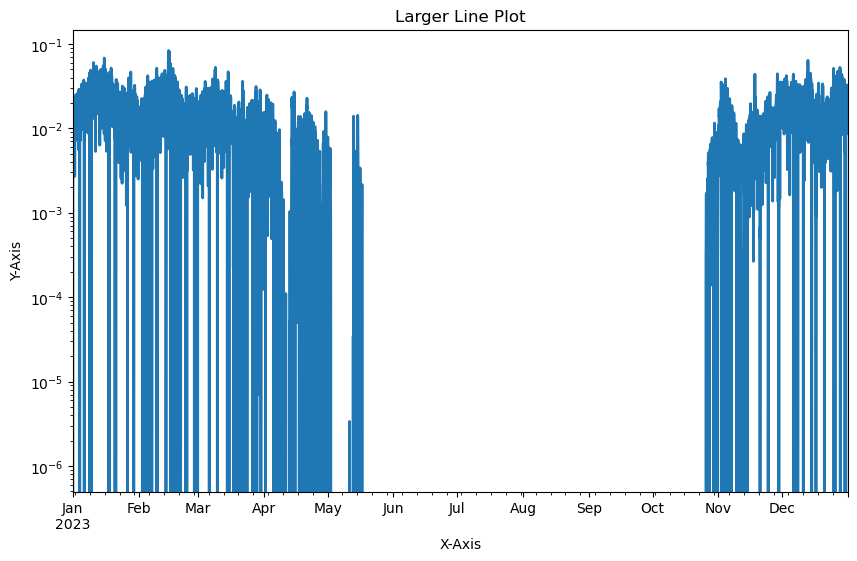

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming heating_demand is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed (width, height)
heating_demand["P111_0_W8_R10"].plot(kind='line', linewidth=2,logy=True)

plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Larger Line Plot")

plt.show()


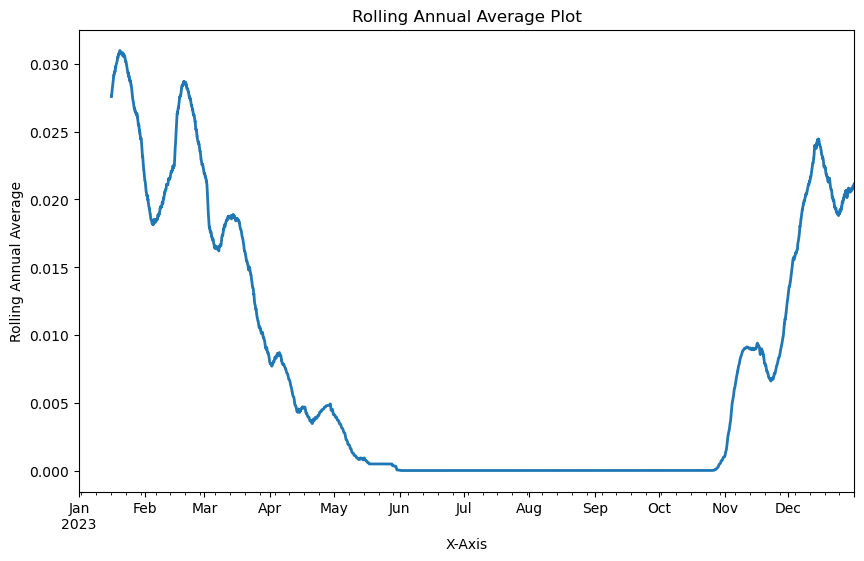

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


window_size = 365  # Set the window size to 365 for rolling annual average


rolling_avg = heating_demand["P111_0_W8_R10"].rolling(window=window_size).mean()


plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
rolling_avg.plot(kind='line', linewidth=2)

plt.xlabel("X-Axis")
plt.ylabel("Rolling Annual Average")
plt.title("Rolling Annual Average Plot")

plt.show()


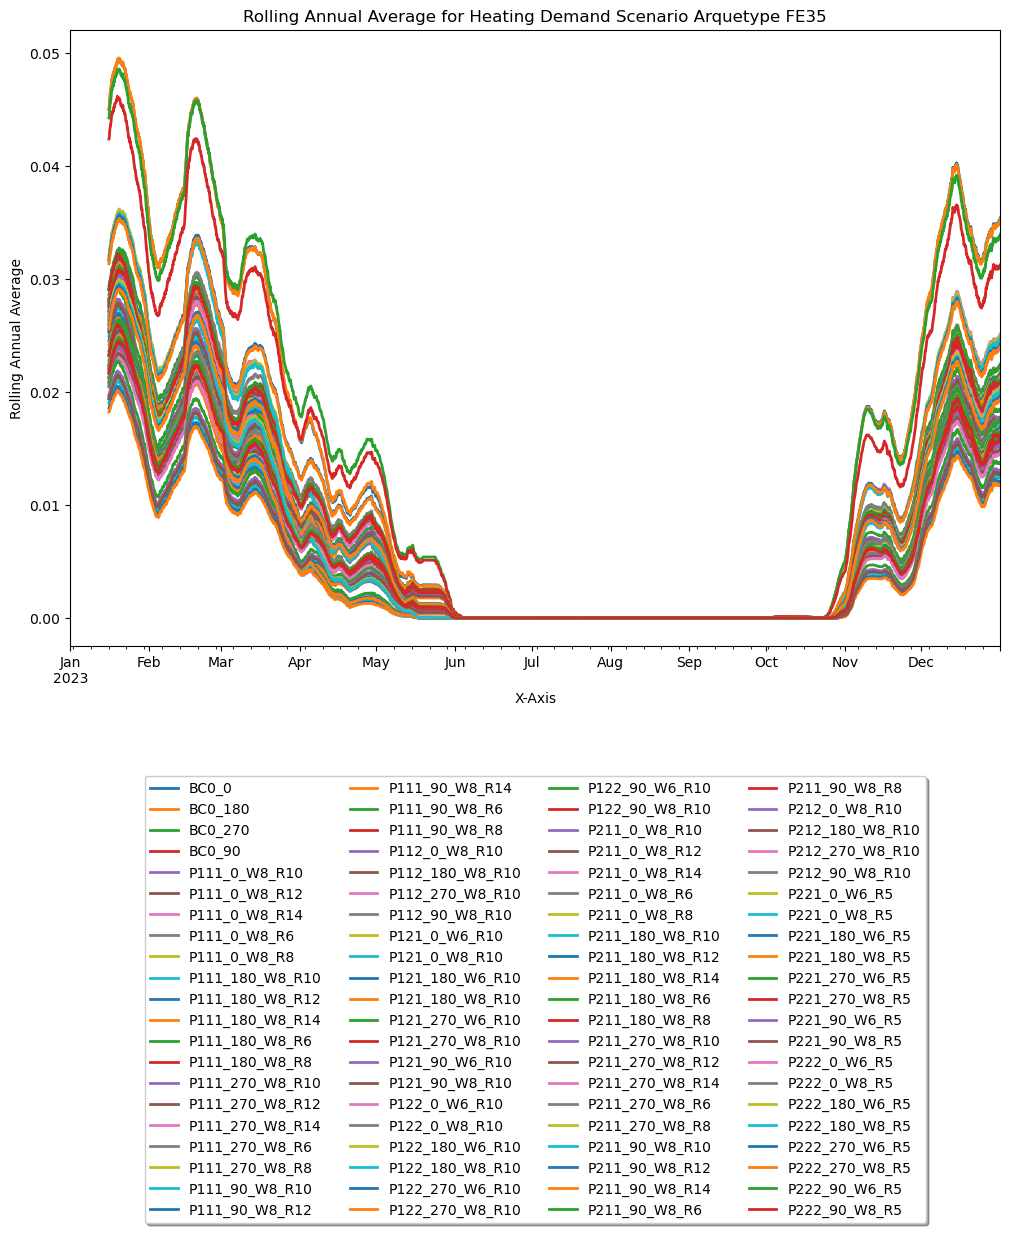

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming heating_demand is your DataFrame
window_size = 365  # Set the window size to 365 for rolling annual average

# Calculate the rolling annual average for all columns
rolling_avg = heating_demand.rolling(window=window_size).mean()

# Plot the rolling annual average for all columns
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed

# Loop through columns and plot each one
for column in rolling_avg.columns:
    rolling_avg[column].plot(label=column, linewidth=2)

plt.xlabel("X-Axis")
plt.ylabel("Rolling Annual Average")
plt.title("Rolling Annual Average for Heating Demand Scenario Arquetype FE35")

# Place the legend under the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)

plt.show()



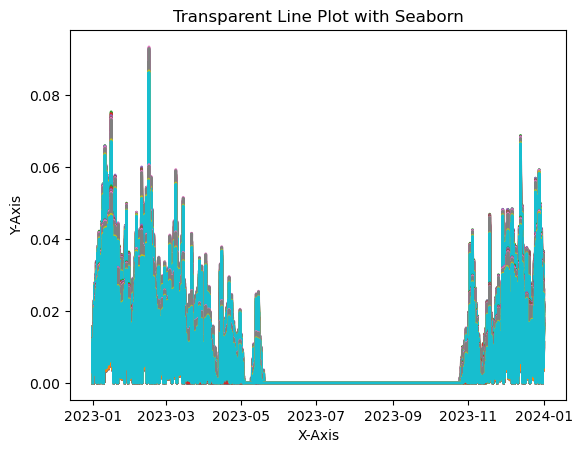

In [24]:
import seaborn as sns
import pandas as pd
columns_to_plot = heating_demand.columns[4:]  # Select all columns starting from the 4th column

# Create a line plot for each column
for column in columns_to_plot:
    sns.lineplot(data=heating_demand, x=heating_demand.index, y=column, linewidth=2, hue=None, palette=None,legend='auto')  # Adjust alpha as needed

plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Transparent Line Plot with Seaborn")

plt.show()




In [ ]:
heating_demand.iloc[:,4:].plot()

In [ ]:
heating_demand2 = heating_demand.merge(df2,left_index=True,right_index=True)
heating_demand2

In [ ]:
heating_demand2.transpose()

In [ ]:
df2[["non3","type", "Windows","Ecological","Material", "Other"]] = df2["Retrofit_type"].str.split('',expand=True)
df2

In [ ]:


# Abstract method import

from abc import ABC, abstractmethod

# Repositories


from repositories import csvTRNSYS
from utils import comfortValues, comfortGraph, transformation_EP_CO2
# Abstract class


class currencyAnalysis(ABC):
    def __init__(self, n_viv, name):
        self.n_viv = n_viv
        self.name = name
    @abstractmethod
    def analysisCalculation(self):
        pass


class energyAnalysis(currencyAnalysis):  # Calculation of the investment with CMH data as a cost input
    """
    Parameters:
        
        n_viv (int) -- Número de viviendas simuladas
        name (str) -- Nombre de la carpeta donde están los resultados de las simulaciones
       
    """    
    def __init__(self, n_viv, name):
        currencyAnalysis.__init__(self, n_viv, name)
    def analysisCalculation(self):
        
        # Lectura de los archivos que salen directamente de la simulación en TRNSYS (ver word "detallesinputs")
        
        typeStep = csvTRNSYS.HourlyMulti() 
        output = csvTRNSYS.readTRNSYS(typeStep, self.n_viv, self.name)
        output_reader, P_ht, P_cl, P_lig, P_dev, P_dhw = output.start()
        
        # Repartición de consumos para el caso en donde no haya reforma de la parte activa

        grado_ht = {'joule':0.32,'BC':0.31,'caldera_GN':0.27,'butano':0.06,'nada':0.04}
        grado_cl = {'split':0.1,'BC':0.43,'multi_split':0.04,'nada':0.43}
        grado_dhw ={'caldera_GN':0.86,'butano':0.14,'BC':0}
        
        # Diccionarios con el mismo formato que P_ht. P_cl, P_lig, P_dev y P_dhw
        
        PE_ht = {}
        PE_cl = {}
        PE_lig = {}
        PE_dev = {}
        PE_dhw = {}
     
        # Instancia de la clase para pasar de demanda a consumo de energía primaria.
         
        project = transformation_EP_CO2.pE_ARV_demand(grado_ht, grado_cl, grado_dhw)
        for i in P_ht:
            
            # El método pE_ARV_demand que se encuentra dentro de la clase transformation_EP_CO2 se ejectura 1 vez por cada simulación leída
            
            output = transformation_EP_CO2.calculo(project, P_ht[i], P_cl[i], P_lig[i],P_dev[i],P_dhw[i])
            PE_ht_aux, PE_cl_aux, PE_lig_aux,PE_dev_aux ,PE_dhw_aux = output.start()
            PE_ht.setdefault(i, PE_ht_aux)
            PE_cl.setdefault(i, PE_cl_aux)
            PE_lig.setdefault(i, PE_lig_aux)
            PE_dev.setdefault(i,PE_dev_aux)
            PE_dhw.setdefault(i, PE_dhw_aux)
                

        CO2_ht = {}
        CO2_cl = {}
        CO2_lig = {}
        CO2_dev = {}
        CO2_dhw = {}
        
        # Instancia de la clase para pasar de demanda a emisiones de CO2
        
        project = transformation_EP_CO2.CO2_ARV_demand(grado_ht, grado_cl, grado_dhw)
        for i in P_ht:
            
            # El método CO2_ARV_demand que se encuentra dentro de la clase transformation_EP_CO2 se ejectura 1 vez por cada simulación leída
            
            output = transformation_EP_CO2.calculo(
                project, P_ht[i], P_cl[i], P_lig[i],P_dev[i],P_dhw[i])
            CO2_ht_aux, CO2_cl_aux, CO2_lig_aux, CO2_dev_aux, CO2_dhw_aux   = output.start()
            CO2_ht.setdefault(i, CO2_ht_aux)
            CO2_cl.setdefault(i, CO2_cl_aux)
            CO2_lig.setdefault(i, CO2_lig_aux)
            CO2_dev.setdefault(i,CO2_dev_aux)
            CO2_dhw.setdefault(i, CO2_dhw_aux)

        return P_ht, P_cl, P_lig, P_dev, P_dhw, PE_ht, PE_cl, PE_lig,PE_dev ,PE_dhw, CO2_ht, CO2_cl, CO2_lig, CO2_dev, CO2_dhw                               

class comfortAnalysis(currencyAnalysis):  
    """
    
    Lectura de los valores de comfort *** falta reprogramación a las nuevas simulaciones. Para la reprogramación se propone:
    
    1) No sacar los gráficos directamente, los outputs deben ser los valores de humidex y temperatura operativa que se calculan en el 'util' comfortValues()
    2) Ajustar la lectura y sobretodo los outputs de TRNSYS para que los parámetros saen los mismos que en la clase energyAnalysis(), n_viv + name
    3) n_viv son las viviendas simuladas, este valor debe servir para que el código lea inequivocamente donde tiene que leer, columnas del .out/.csv. Tomar como ejemplo csvTRNSYS.HourlyMulti() 
    
    """
    
    def __init__(self, n_viv, name):
        currencyAnalysis.__init__(self, n_viv, name)
    def analysisCalculation(self):
        pass
        typeStep = csvTRNSYS.comfortMulti()
        output = csvTRNSYS.readTRNSYS(typeStep, self.n_viv)
        Humidex, T_op = output.start()    
        x_graph_comfort = {}
        point_graph_comfort = {}
        x_graph_summer_dis = {}
        y_graph_winter_dis = {}
        
        for i in Humidex:
            
            typeAnalysis = comfortValues.humidexIndex()
            output = comfortValues.calculo(typeAnalysis, Humidex[i])
            humidexOutcomes = output.start()
            
            typeAnalysis = comfortValues.TopIndex()
            output = comfortValues.calculo(typeAnalysis, T_op[i])
            topOutcomes = output.start()            
            

            typeAnalysis = comfortGraph.comfortGraph()
            output = comfortGraph.calculo(typeAnalysis, humidexOutcomes,topOutcomes, self.n_viv)
            x_graph_comfort_aux, point_graph_comfort_aux, x_graph_summer_dis_aux,y_graph_winter_dis_aux = output.start()

            x_graph_comfort.setdefault(i, x_graph_comfort_aux)
            point_graph_comfort.setdefault(i, point_graph_comfort_aux)
            x_graph_summer_dis.setdefault(i, x_graph_summer_dis_aux)
            y_graph_winter_dis.setdefault(i, y_graph_winter_dis_aux)  

class do_analysis:
    def __init__(self, Project: currencyAnalysis):
        self.Project = Project

    def start(self):
        return self.Project.analysisCalculation()

if __name__ == '__main__':
    n_zones = 1
    n_viv = 1
    building_to_analyse = 'FE35'

    project = energyAnalysis(n_viv = n_viv, name = building_to_analyse)
    data = do_analysis(project)
    output_reader_LCA, P_ht, P_cl, P_lig, P_dev, P_dhw, PE_ht, PE_cl, PE_lig,PE_dev ,PE_dhw, CO2_ht, CO2_cl, CO2_lig, CO2_dev, CO2_dhw,ET  = data.start()

    print(P_ht)
    print(PE_ht)
    print(CO2_ht)

In [ ]:
from abc import ABC, abstractmethod
import os
# Repositories
project_folder = r'C:\Users\avaquero\OneDrive - IREC-edu\CODI\11_AnalysisArchetype_Génerico'
os.chdir(project_folder)

typeStep = csvTRNSYS.HourlyMulti() 
n_zones = 1
name = 'FE35'
output = csvTRNSYS.readTRNSYS(typeStep, n_viv, name)

In [ ]:
output.start()

In [ ]:
os.getcwd()